In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
user_levels_df = pd.read_csv('Data/user_levels.csv')
user_levels_df.sort_values(by = 'author', ascending = True).head(20)

,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2
1855,1855,--fr0stbit3--,N:🇺🇸 A2:🇪🇸,['en'],[],['es'],[],[],[],[]
1118,1118,-TNB-o-,🇺🇸 -> 🇯🇵,[],[],[],[],[],[],[]
1319,1319,-Vampires-,EN | ES | CN,[],[],[],[],[],[],[]
813,813,-tobyt,N 🇬🇧 | B2 🇪🇸 | B1 🇫🇷,['en'],[],[],['fr'],['es'],[],[]
1485,1485,-wojteq-,🇵🇱 N | 🇬🇧 B2 | 🇷🇺 A1,['pl'],['ru'],[],[],['en'],[],[]
1139,1139,069988244,N🇬🇧 | 🇫🇷,['en'],[],[],[],[],[],[]
900,900,0mnicious,🇬🇧 🇵🇹 N | 🇮🇹 B1 🇯🇵 A2,[],[],[],[],[],[],[]
918,918,1001010010012,🇪🇦 N 🇺🇸 C1 🇲🇫 B2,['es'],[],[],[],['fr'],['en'],[]
1172,1172,1020randomperson,🇰🇷 | 🏴󠁧󠁢󠁥󠁮󠁧󠁿🇯🇵 | 🇫🇷 | 🇬🇪,[],[],[],[],[],[],[]
410,410,11abjurer,le epic flair,[],[],[],[],[],[],[]


We first want to keep only the native english speakers

In [3]:
print('The dataset contains ', user_levels_df['N'].str.contains('en|EN|En|eN').sum(), ' native english speakers.')

The dataset contains  825  native english speakers.


In [4]:
native_english_df = user_levels_df[user_levels_df['N'].str.contains('en|EN|En|eN')]
native_english_df.sort_values(by = 'author', ascending=True)

,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2
1855,1855,--fr0stbit3--,N:🇺🇸 A2:🇪🇸,['en'],[],['es'],[],[],[],[]
813,813,-tobyt,N 🇬🇧 | B2 🇪🇸 | B1 🇫🇷,['en'],[],[],['fr'],['es'],[],[]
1139,1139,069988244,N🇬🇧 | 🇫🇷,['en'],[],[],[],[],[],[]
462,462,1ast0ne,🇺🇸N | 🇩🇪B1 🇪🇸 B1 | trying out: 🇦🇪 🇭🇹 🇮🇪,['en'],[],[],"['de', 'es']",[],[],[]
649,649,2plash6,🇺🇸N🇷🇺Тrуing му беsт🇪🇸HS Only,['en'],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...
1993,1993,yxngfabio,🇺🇸 N | 🇪🇸 C1 | 🇧🇷 C1 | 🇷🇺 B1 | 🇨🇳 HSK1,['en'],[],[],['ru'],[],"['es', 'pt']",[]
1944,1944,zamo555,🇬🇧N | 🇫🇷🇰🇷A2,['en'],[],[],[],[],[],[]
595,595,zazzerida,En N | Fr B2; Es A2; It A2; De A2,['En'],[],"['Es', 'It', 'De']",[],['Fr'],[],[]
367,367,zealouspilgrim,Native: 🇨🇦 | Learning: ht,['en'],[],[],[],[],[],[]


Now, we load the comments from all the native english speakers authors to add a column "comments" and statistics about this comments in the main dataset. 

In [7]:
main_df = pd.read_csv('Data/user_levels.csv')

In [8]:
# Reduce the main dataframe to the column of interest  
main_df = main_df[['author', 'N']]

# path to my json files folder
path_to_json = 'Data/user_comments/'

# initialize empty array to construct the new columns in the for loop afterwards
body = []
average_number_of_words = []
number_of_comments = []
total_words = []

# Look through all the native english authors .json to extract the comments and their statistics : average number of words and number of comments per author 
for index, row in main_df.iterrows():
    df = pd.read_json(path_to_json + row['author'] + '.json')

    # Some author doesn't have any comments in their json files because they are suspended
    # We fill their values with NaNs
    if (df.iloc[0][0] == 'suspended'):
        print(row['author'], "is suspended.")
        body.append(np.NaN)
        average_number_of_words.append(np.NaN)
        total_words.append(np.NaN)
        number_of_comments.append(np.NaN)
    
    # For the other authors, all the comments are put in a list, 
    # we count the number of words in average and the number of comments
    else:
        body.append(df.body.to_list())
        average_number_of_words.append(df['body'].apply(lambda n: len(n.split())).mean())
        total_words.append(df['body'].apply(lambda n: len(n.split())).sum())
        number_of_comments.append(len(df.body))

# Add columns of comments, average number of words per comment and number of comments to the main dataframe
main_df['comments'] = body 
main_df['nb_comments'] = number_of_comments
native_english_df['average_nb_words'] = average_number_of_words
native_english_df['total_words'] = total_words

native_english_df.sort_values(by = 'total_words').head(50)  

ValueError: Expected object or value

We will then explore the statistics of the different authors in order to eliminate the outliers, standardize, normalize, etc

In [ ]:
native_english_df[['nb_comments', 'total_words']].describe()

,nb_comments,total_words
count,823.000000,823.000000
mean,617.393682,24892.465371
std,391.039516,25537.449418
min,1.000000,5.000000
25%,205.500000,6194.500000
50%,773.000000,18802.000000
75%,997.000000,35562.500000
max,1000.000000,318697.000000


<AxesSubplot: >

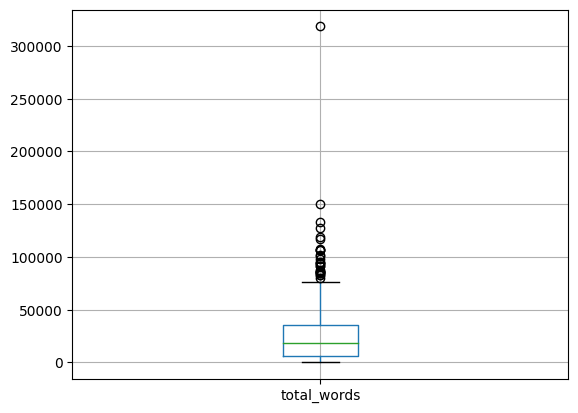

In [ ]:
native_english_df[['total_words']].boxplot()

Some authors have written only one comments. It's not enough to train a model on it. We have to determine how many comments minimum we should keep and We need to determine how we treat authors who write comments with few words: do we eliminate them, merge their commenters to have longer ones or do we estimate that the number of words is a feature in itself?

In [ ]:
min_nb_comments = 50
perc = (native_english_df['nb_comments'] > min_nb_comments).sum() / len(native_english_df)
print("If we take", min_nb_comments, 'comments per author as a lower boundary,', round(perc*100), '% of the dataset is remaining.')

If we take 50 comments per author as a lower boundary, 89 % of the dataset is remaining.


## Number of words in total per author and per proficiency

In [77]:
main_df = pd.read_csv('Data/user_levels.csv')
main_df.head(20)

,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2
0,0,jlba64,N:fr,['fr'],[],[],[],[],[],[]
1,1,alexsteb,German N | English C1 | Korean B1 | Mandarin B1,['de'],[],[],['ko'],[],['en'],[]
2,2,Noktilucent,"🇺🇸(N) | 🇲🇽 (B1), 🇩🇪 (A2), 🇮🇹 (A2)",['en'],[],"['de', 'it']",['es'],[],[],[]
3,3,makingthematrix,🇵🇱 native | 🇺🇸 fluent | 🇫🇷 learning | 🇩🇪 murmeln,['pl'],[],[],[],[],[],[]
4,4,jammal20,🇪🇬 N 🇺🇸 F 🇮🇱 B2 🇹🇷 A2 🇪🇸 A2 🇬🇷 Know the alphabet,['ar'],[],"['tr', 'es']",[],['he'],[],[]
5,5,kaeya_lilies,New member,[],[],[],[],[],[],[]
6,6,pidgeon-eater-69,🇺🇸/🏳️‍⚧️(N)🇩🇪(B2)🇲🇽(B1),[],[],[],[],[],[],[]
7,7,Frenes,FrenesEN N | 中文 S/C1 | FR AL | ES IM | IT NH |...,[],[],[],[],[],[],[]
8,8,himit,"Japanese C2, Mando C2",[],[],[],[],[],[],['ja']
9,9,ii_akinae_ii,🇺🇲 (Native); 🇨🇳 (B1); 🇰🇷 (Beginner),['en'],[],[],['zh'],[],[],[]


In [78]:
import os
def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

In [79]:
# path to my json files folder
path_to_json = 'Data/user_comments/'

# initialize empty array to construct the new columns in the for loop afterwards
body = []
average_number_of_words = []
number_of_comments = []
total_words  = []
comment_date = []

# Look through all the native english authors .json to extract the comments and their statistics : average number of words and number of comments per author 
for index, row in main_df.iterrows():
    # path to the json file of the row author 
    fpath = path_to_json + row['author'] + '.json'

    # Check if the file is empty or not. For e.g., jlba64 json file is empty
    if is_non_zero_file(fpath):
        df = pd.read_json(path_to_json + row['author'] + '.json')

        # Some author doesn't have any comments in their json files because they are suspended
        # We fill their values with NaNs
        if (df.iloc[0][0] == 'suspended') or (df.iloc[0][0] == 'deleted'):
            print(row['author'], "is suspended.")
            body.append(np.NaN)
            average_number_of_words.append(np.NaN)
            total_words.append(np.NaN)
            number_of_comments.append(np.NaN)
            comment_date.append(np.NaN)

        
        # For the other authors, all the comments are put in a list, 
        # we count the number of words in average and the number of comments
        else:
            body.append(df.body.to_list())
            average_number_of_words.append(df['body'].apply(lambda n: len(n.split())).mean())
            total_words.append(df['body'].apply(lambda n: len(n.split())).sum())
            number_of_comments.append(len(df.body))
            comment_date.append(df['created_utc'])
    else:
        body.append(np.NaN)
        average_number_of_words.append(np.NaN)
        total_words.append(np.NaN)
        number_of_comments.append(np.NaN)
        comment_date.append(np.NaN)

# Add columns of comments, average number of words per comment and number of comments to the main dataframe
main_df['comments'] = body
main_df['nb_comments'] = number_of_comments
main_df['created_utc'] = comment_date
main_df['average_nb_words'] = average_number_of_words
main_df['total_words'] = total_words

main_df.head(20)

lemon_lime2000 is suspended.
valkoem is suspended.
mirajane205 is suspended.
MeNoThinkyBrain is suspended.
Gakutoooo is suspended.
Kenta_Yam49 is suspended.
ILikeJapaneseMuch3 is suspended.
LiterallySoFamous is suspended.
JeswiCan is suspended.


,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2,comments,nb_comments,created_utc,average_nb_words,total_words
0,0,jlba64,N:fr,['fr'],[],[],[],[],[],[],NaN,NaN,NaN,NaN,NaN
1,1,alexsteb,German N | English C1 | Korean B1 | Mandarin B1,['de'],[],[],['ko'],[],['en'],[],[Check out TalkToMeInKorean. They at least HAD...,974.0,0 1666878614 1 1666874877 2 166...,37.812115,36829.0
2,2,Noktilucent,"🇺🇸(N) | 🇲🇽 (B1), 🇩🇪 (A2), 🇮🇹 (A2)",['en'],[],"['de', 'it']",['es'],[],[],[],"[The crossover we need, not the crossover we d...",508.0,0 1666906873 1 1666749737 2 166...,38.811024,19716.0
3,3,makingthematrix,🇵🇱 native | 🇺🇸 fluent | 🇫🇷 learning | 🇩🇪 murmeln,['pl'],[],[],[],[],[],[],"[I have a bunch of old handbooks in pdfs, esp....",999.0,0 1666901200 1 1666898302 2 166...,73.427427,73354.0
4,4,jammal20,🇪🇬 N 🇺🇸 F 🇮🇱 B2 🇹🇷 A2 🇪🇸 A2 🇬🇷 Know the alphabet,['ar'],[],"['tr', 'es']",[],['he'],[],[],"[Thank you!, It’s really illegible, can you de...",998.0,0 1664091235 1 1664049833 2 166...,21.538076,21495.0
5,5,kaeya_lilies,New member,[],[],[],[],[],[],[],"[Read manga in Japanese, watch anime without s...",21.0,0 1664621208 1 1664621066 2 166462...,67.047619,1408.0
6,6,pidgeon-eater-69,🇺🇸/🏳️‍⚧️(N)🇩🇪(B2)🇲🇽(B1),[],[],[],[],[],[],[],"[ive been seeing it too. weird, Ope! Forgot to...",999.0,0 1666811214 1 1666701199 2 166...,14.915916,14901.0
7,7,Frenes,FrenesEN N | 中文 S/C1 | FR AL | ES IM | IT NH |...,[],[],[],[],[],[],[],[I was at a night market in southern Taiwan an...,1000.0,0 1666906896 1 1666820970 2 166...,73.968000,73968.0
8,8,himit,"Japanese C2, Mando C2",[],[],[],[],[],[],['ja'],[> Revoke their fucking diplomatic immunity an...,1000.0,0 1666910420 1 1666893636 2 166...,61.466000,61466.0
9,9,ii_akinae_ii,🇺🇲 (Native); 🇨🇳 (B1); 🇰🇷 (Beginner),['en'],[],[],['zh'],[],[],[],[what's your treatment regimen? for me person...,955.0,0 1666940499 1 1666894727 2 166...,60.512042,57789.0


In [81]:
main_df[['created_utc']]

,created_utc
0,NaN
1,0 1666878614 1 1666874877 2 166...
2,0 1666906873 1 1666749737 2 166...
3,0 1666901200 1 1666898302 2 166...
4,0 1664091235 1 1664049833 2 166...
...,...
2139,0 1666689763 1 1666655324 2 166...
2140,0 1665848789 1 1664782873 2 166407750...
2141,0 1666314975 1 1666218115 2 166...
2142,0 1668259004 1 1667939891 2 166774...


Now we have to eliminate rows without language level nor comments.

In [13]:
# Rows without comments
print('There are', main_df.comments.isna().sum(), 'authors without any comments whether their account is suspended or deleted.')

# Keep only authors with at least one 
main_df_not_na = main_df[main_df.comments.notna()]
main_df_not_na.head(5)

# Among them, keep the authors with an identified language level:
has_a_flair = (main_df["N"].str.len() > 2) | (main_df["A1"].str.len() > 2) | (main_df["A2"].str.len() > 2) | (main_df["B1"].str.len() > 2) | (main_df["B2"].str.len() > 2) | (main_df["C1"].str.len() > 2) | (main_df["C2"].str.len() > 2)
print('There are', (~has_a_flair).sum(), "with an unidentified author's language level.")
main_df_not_na = main_df_not_na[has_a_flair]

print('There are', has_a_flair.sum(), 'authors left.')
main_df_not_na.head()

There are 27 authors without any comments whether their account is suspended or deleted.
There are 551 with an unidentified author's language level.
There are 1593 authors left.


/var/folders/9y/ryc1xybn5gbczjsb6wzyvwr40000gn/T/ipykernel_59923/3772507955.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  main_df_not_na = main_df_not_na[has_a_flair]


,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2,comments,nb_comments,average_nb_words,total_words
1,1,alexsteb,German N | English C1 | Korean B1 | Mandarin B1,['de'],[],[],['ko'],[],['en'],[],[Check out TalkToMeInKorean. They at least HAD...,974.0,37.812115,36829.0
2,2,Noktilucent,"🇺🇸(N) | 🇲🇽 (B1), 🇩🇪 (A2), 🇮🇹 (A2)",['en'],[],"['de', 'it']",['es'],[],[],[],"[The crossover we need, not the crossover we d...",508.0,38.811024,19716.0
3,3,makingthematrix,🇵🇱 native | 🇺🇸 fluent | 🇫🇷 learning | 🇩🇪 murmeln,['pl'],[],[],[],[],[],[],"[I have a bunch of old handbooks in pdfs, esp....",999.0,73.427427,73354.0
4,4,jammal20,🇪🇬 N 🇺🇸 F 🇮🇱 B2 🇹🇷 A2 🇪🇸 A2 🇬🇷 Know the alphabet,['ar'],[],"['tr', 'es']",[],['he'],[],[],"[Thank you!, It’s really illegible, can you de...",998.0,21.538076,21495.0
8,8,himit,"Japanese C2, Mando C2",[],[],[],[],[],[],['ja'],[> Revoke their fucking diplomatic immunity an...,1000.0,61.466000,61466.0


Now that only authors with all the useful information left, We will keep those with more than 5000 written words on all the comments.

In [34]:
main_df_final = main_df_not_na[main_df_not_na['total_words'] >= 5000]
print('There are', len(main_df_final), 'authors who have written more than 5000 words.')
main_df_final.head()

There are 1206 authors who have written more than 5000 words.


,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2,comments,nb_comments,average_nb_words,total_words
1,1,alexsteb,German N | English C1 | Korean B1 | Mandarin B1,['de'],[],[],['ko'],[],['en'],[],[Check out TalkToMeInKorean. They at least HAD...,974.0,37.812115,36829.0
2,2,Noktilucent,"🇺🇸(N) | 🇲🇽 (B1), 🇩🇪 (A2), 🇮🇹 (A2)",['en'],[],"['de', 'it']",['es'],[],[],[],"[The crossover we need, not the crossover we d...",508.0,38.811024,19716.0
3,3,makingthematrix,🇵🇱 native | 🇺🇸 fluent | 🇫🇷 learning | 🇩🇪 murmeln,['pl'],[],[],[],[],[],[],"[I have a bunch of old handbooks in pdfs, esp....",999.0,73.427427,73354.0
4,4,jammal20,🇪🇬 N 🇺🇸 F 🇮🇱 B2 🇹🇷 A2 🇪🇸 A2 🇬🇷 Know the alphabet,['ar'],[],"['tr', 'es']",[],['he'],[],[],"[Thank you!, It’s really illegible, can you de...",998.0,21.538076,21495.0
8,8,himit,"Japanese C2, Mando C2",[],[],[],[],[],[],['ja'],[> Revoke their fucking diplomatic immunity an...,1000.0,61.466000,61466.0


In [35]:
# Before plotting, we will look for the 
df_hist =  main_df_final.copy()
df_hist[['N', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']].apply(lambda x: x.replace(r"[']", '').str.lower())


,N,A1,A2,B1,B2,C1,C2
1,['de'],[],[],['ko'],[],['en'],[]
2,['en'],[],"['de', 'it']",['es'],[],[],[]
3,['pl'],[],[],[],[],[],[]
4,['ar'],[],"['tr', 'es']",[],['he'],[],[]
8,[],[],[],[],[],[],['ja']
...,...,...,...,...,...,...,...
2130,['it'],[],[],[],[],[],[]
2133,['fi'],[],[],[],[],[],[]
2134,['fr'],['de'],[],[],['es'],[],['en']
2137,['en'],[],[],[],[],[],[]


In [36]:
# Count native speakers for each language, removing the undesirable characters ', [ and ]
native = pd.DataFrame(df_hist['N'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
native.rename(columns = {'index':'countries'}, inplace = True)

'''# Gathers the countries which are not in the top 10 in terms of number of commenters with more than 5000 words written
native.iat[9, 1] = native.N.iloc[10:].sum()
native.iat[9, 0] = 'others'
native = native[:10]'''

native.head(20)

,countries,N
0,en,641
1,es,58
2,de,43
3,fr,43
4,pt,40
5,nl,31
6,pl,29
7,ru,28
8,it,25
9,sv,13


In [60]:
# Count the number of C2 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['C2'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').reset_index())
hist = native.merge(temp, left_on = 'countries', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of C1 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['C1'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
hist = hist.merge(temp, left_on = 'countries', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of B2 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['B2'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').reset_index())
hist = hist.merge(temp, left_on = 'countries', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of B1 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['B1'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
hist = hist.merge(temp, left_on = 'countries', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of A2 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['A2'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
hist = hist.merge(temp, left_on = 'countries', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of A1 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['A1'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
hist = hist.merge(temp, left_on = 'countries', right_on = 'index', how = 'left').drop('index', axis = 1)


# Gathers the countries which are not in the top 10 in terms of number of commenters with more than 5000 words written
hist.iloc[9] = hist.iloc[9:].sum()
hist.iat[9, 0] = 'others'
hist = hist[:10]

hist.set_index('countries')

hist


,countries,N,C2,C1,B2,B1,A2,A1
0,en,641,142.0,110.0,24.0,5.0,2.0,5.0
1,es,58,17.0,52.0,77.0,72.0,54.0,26.0
2,de,43,10.0,24.0,39.0,45.0,30.0,43.0
3,fr,43,14.0,37.0,58.0,49.0,47.0,28.0
4,pt,40,2.0,11.0,4.0,11.0,9.0,6.0
5,nl,31,NaN,1.0,5.0,6.0,5.0,4.0
6,pl,29,NaN,2.0,3.0,2.0,4.0,5.0
7,ru,28,4.0,6.0,10.0,14.0,23.0,25.0
8,it,25,4.0,5.0,11.0,15.0,15.0,14.0
9,others,150,8.0,25.0,34.0,56.0,65.0,77.0


<Figure size 640x480 with 0 Axes>

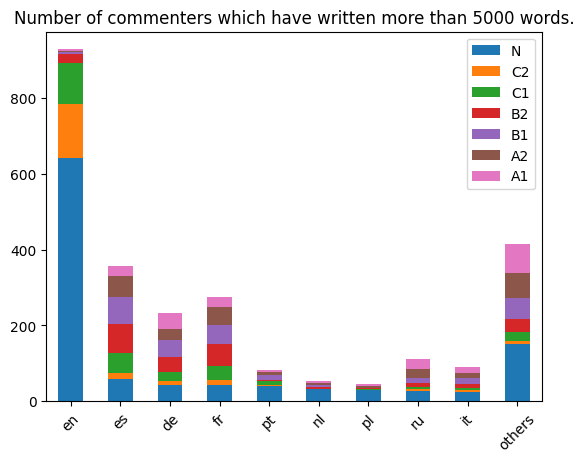

In [75]:
plt.figure()
hist.plot(stacked = True, kind = 'bar')
plt.xticks(ticks = np.arange(0, 9.1, 1),labels = hist.countries.to_list(), rotation = 45)
plt.title('Number of commenters which have written more than 5000 words.')
plt.show()

In [66]:
xticks = hist.countries.to_list()
xticks

['en', 'es', 'de', 'fr', 'pt', 'nl', 'pl', 'ru', 'it', 'others']

In [84]:
test = pd.read_json(path_to_json + 'YouNinjaBro.json')
print()
test[['created_utc']].head(10)

,created_utc
0,1662560100
1,1662485357
2,1661102919
3,1661099546
4,1661098702
5,1660758015
6,1660569599
7,1660214063
8,1660210493
9,1660141233
